## matplotlib
* 주로 2D 그래프를 위한 데스크톱 패키지
* 출판물 수준의 그래프를 만들어내도록 설계
* 파이썬에서 매트랩과 유사한 인터페이스를 지원하기 위해 2002년 존 헌터가 시작
* IPython과 matplotlib 커뮤니티의 협력을 통해 IPython 셸에서 대화형 시각화 구현
<pre> <b> < 기능 ></b>
 * 모든 운영 체제의 다양한 GUI 백엔드 지원
 * PDF, SVG, JPG, PNG, BMP, GIF 등 일반적으로 널리 사용되는 벡터 포맷과 래스터 포맷으로 그래프 저장 가능
</pre>

In [1]:
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
data = np.arange(10)

In [5]:
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

<IPython.core.display.Javascript object>


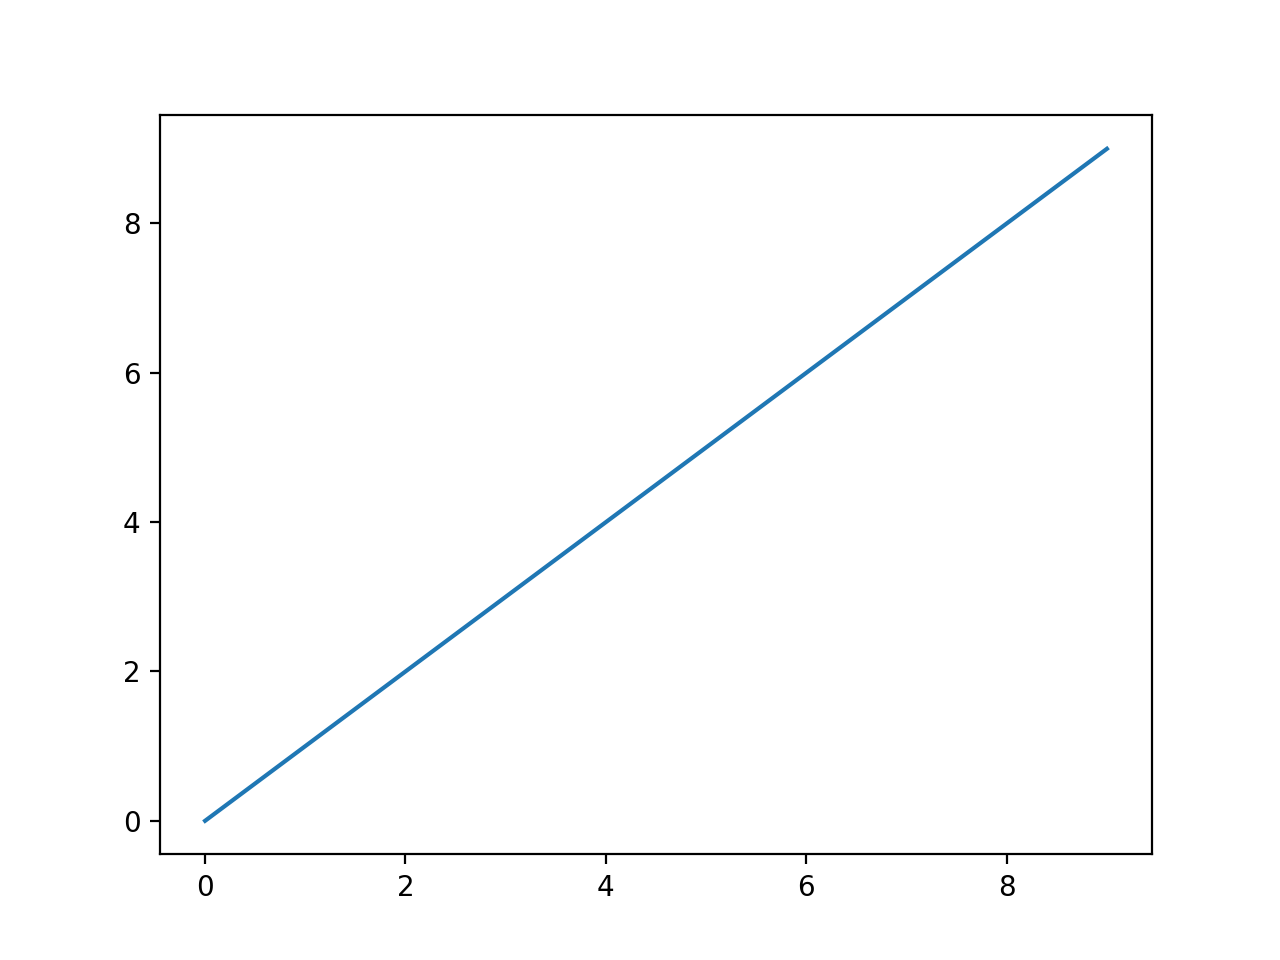

In [6]:
plt.plot(data)

In [ ]:
# matplotlib에서 그래프는 Figure 객체 내 존재
# 그래프를 위한 새로운 figure는 plt.figure를 사용하여 생성
# 주피터에서두 몇 가지 명령 더 안 줘도 빈 화면 나타나네용 'ㅁ'
fig = plt.figure()

In [ ]:
# figsize는 파일에 저장할 경우를 위해 만드려는 figure의 크기와 비율을 지정할 수 있다
# 빈 figure로는 그래프를 그릴 수 없다
# add_subplot을 사용해서 최소 하나 이상의 subplots를 생성
ax1 = fig.add_subplot(2, 2, 1)

In [ ]:
ax2 = fig.add_subplot(2, 2, 2)

In [ ]:
ax3 = fig.add_subplot(2, 2, 3)

<IPython.core.display.Javascript object>


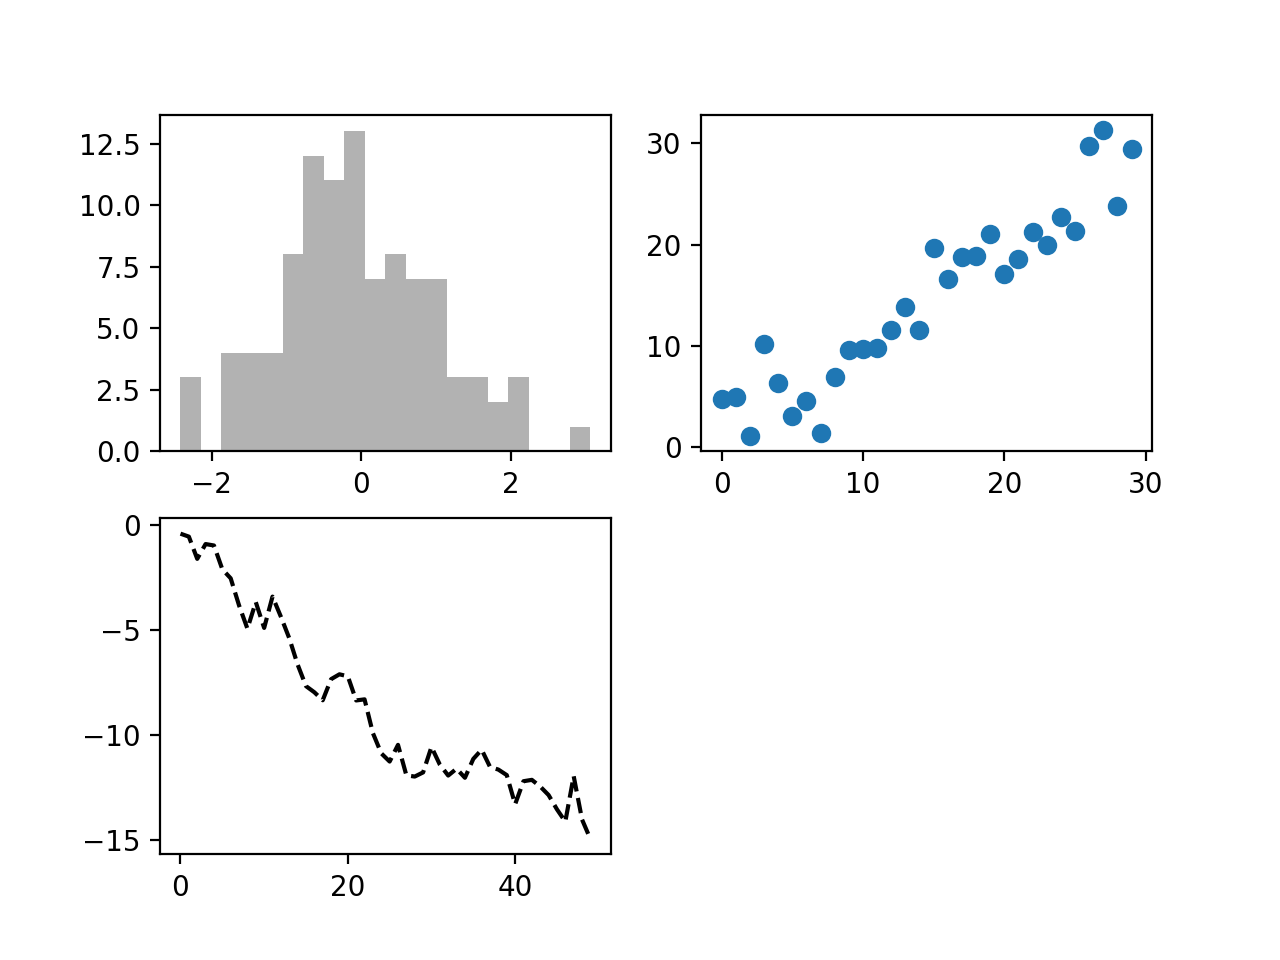

In [7]:
# 위의 명령들을 동시에 실행!
# 오..
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

In [8]:
# 'k--' 옵션은 점선으로 표시
plt.plot(np.random.randn(50).cumsum(), 'k--')

In [9]:
# ax1 자리에 그려졌지
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)

In [10]:
# ax2 자리에 그려졌지
# 이런 식으로 각각의 인스턴스 메서드를 호출해 다른 빈 서브플롯에 그래프를 그릴 수 있다
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

<IPython.core.display.Javascript object>


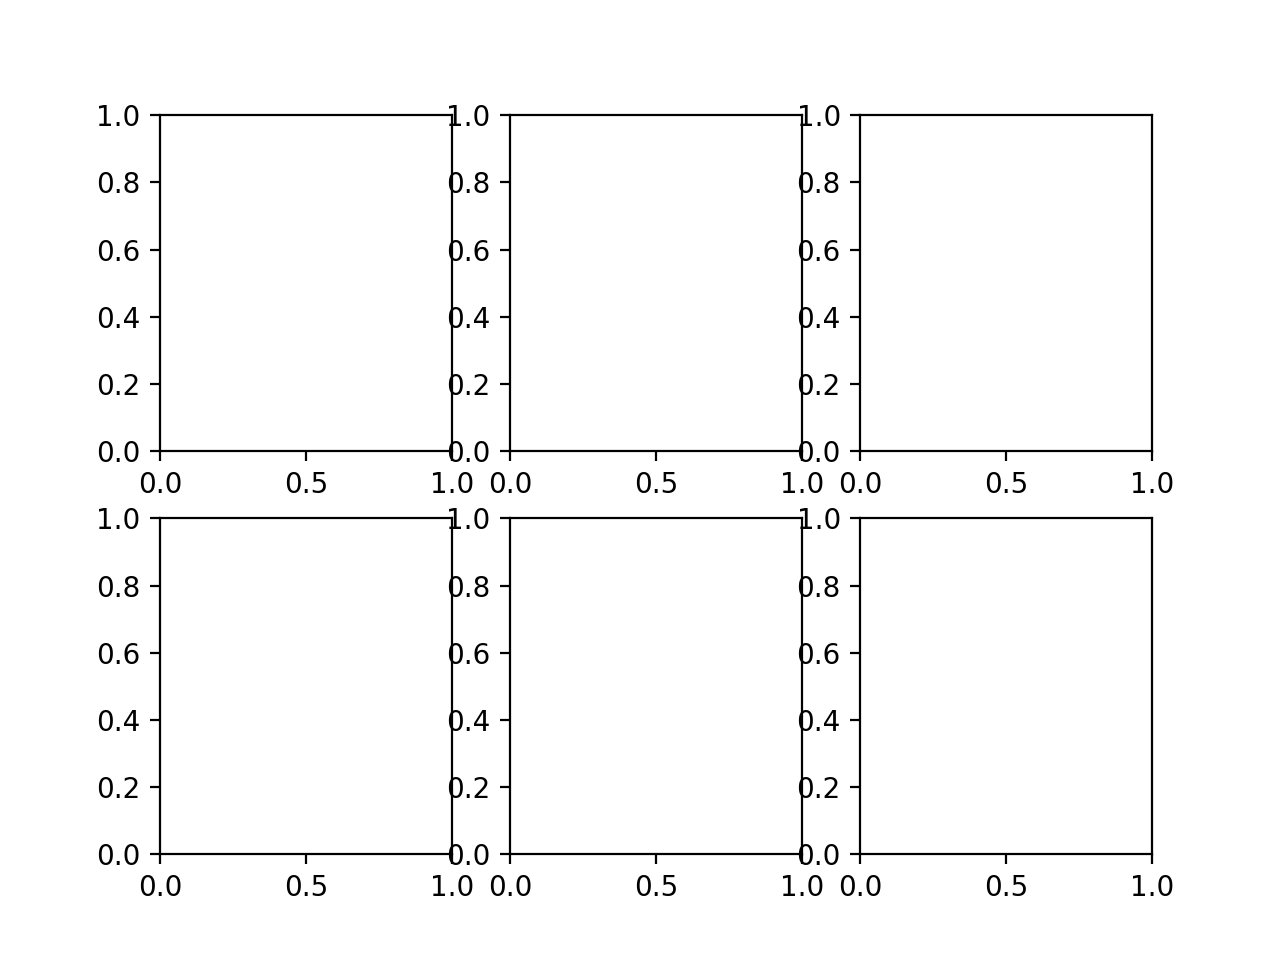

In [12]:
fig, axes = plt.subplots(2, 3)

In [13]:
axes

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

* matplotlib은 서브플롯 간에 적당한 간격(spacing)과 여백(padding)을 추가할 수 있음
* 간격은 전체 그래프의 높이와 너비에 따라 상대적으로 결정
* 아래 코드는 서브 플롯간의 간격을 주지 않은 그래프
<pre>
subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
</pre>

<IPython.core.display.Javascript object>


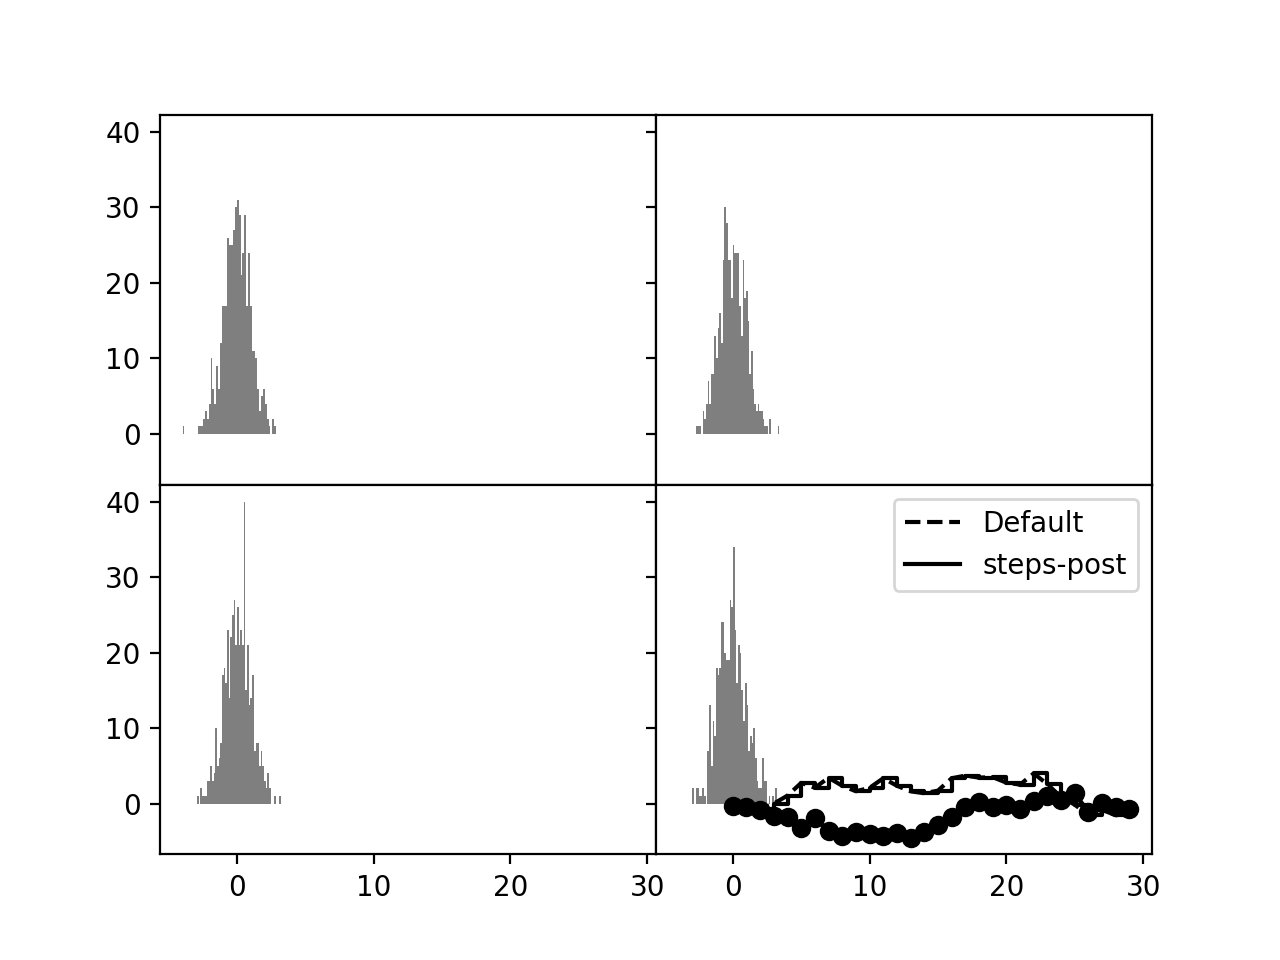

In [15]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

In [17]:
from numpy.random import randn

In [18]:
plt.plot(randn(30).cumsum(), 'ko--')

In [20]:
data = np.random.randn(30).cumsum()

In [21]:
plt.plot(data, 'k--', label='Default')

In [22]:
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')

In [23]:
plt.legend(loc='best')

<IPython.core.display.Javascript object>


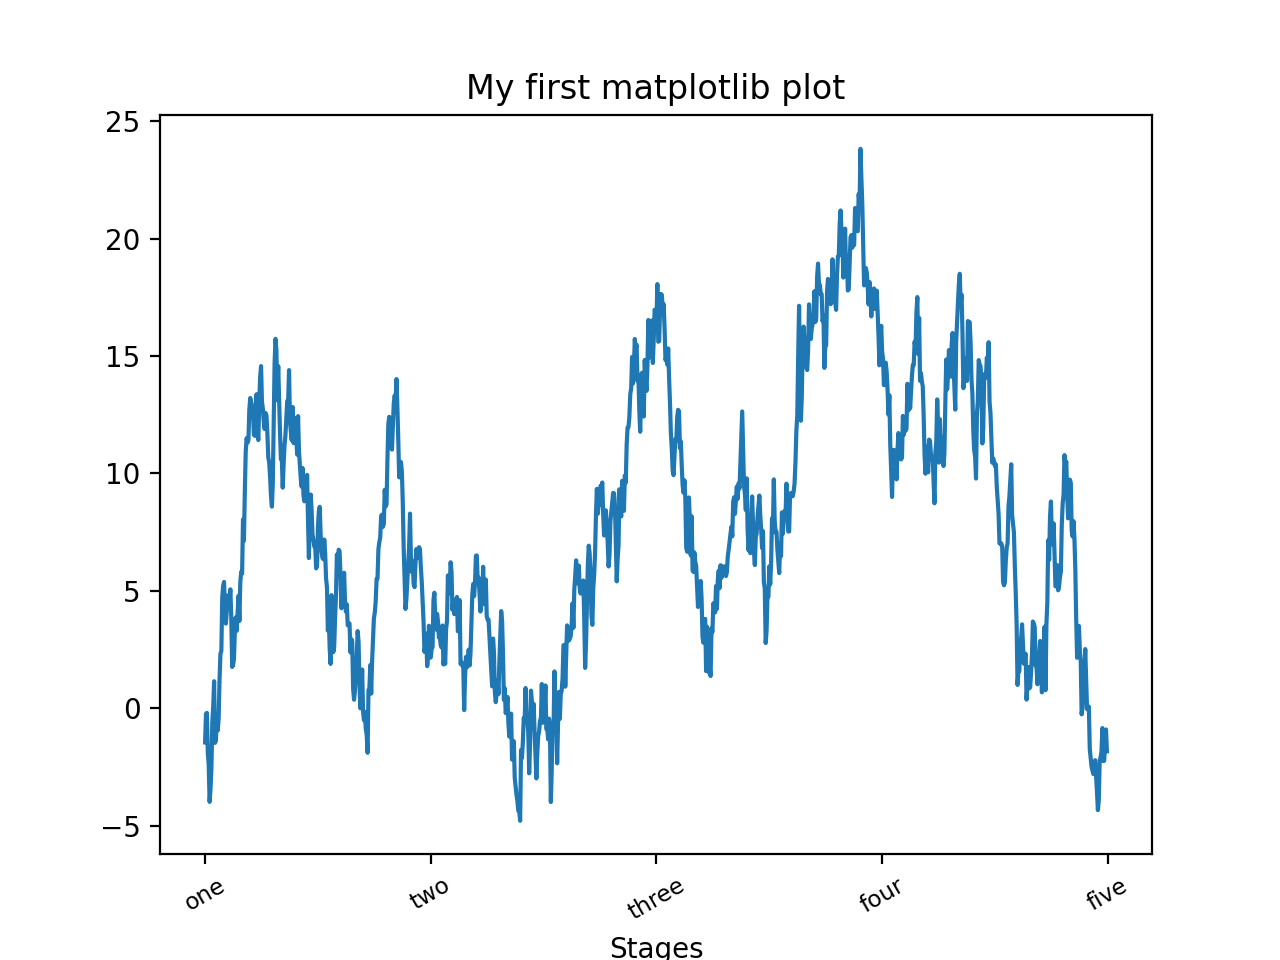

In [26]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

In [27]:
ticks = ax.set_xticks([0, 250, 500, 750, 1000])

In [28]:
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], rotation=30, fontsize='small')

In [29]:
ax.set_title('My first matplotlib plot')

Text(0.5, 1.0, 'My first matplotlib plot')

In [30]:
ax.set_xlabel('Stages')

Text(0.5, 24.438360157402354, 'Stages')

<IPython.core.display.Javascript object>


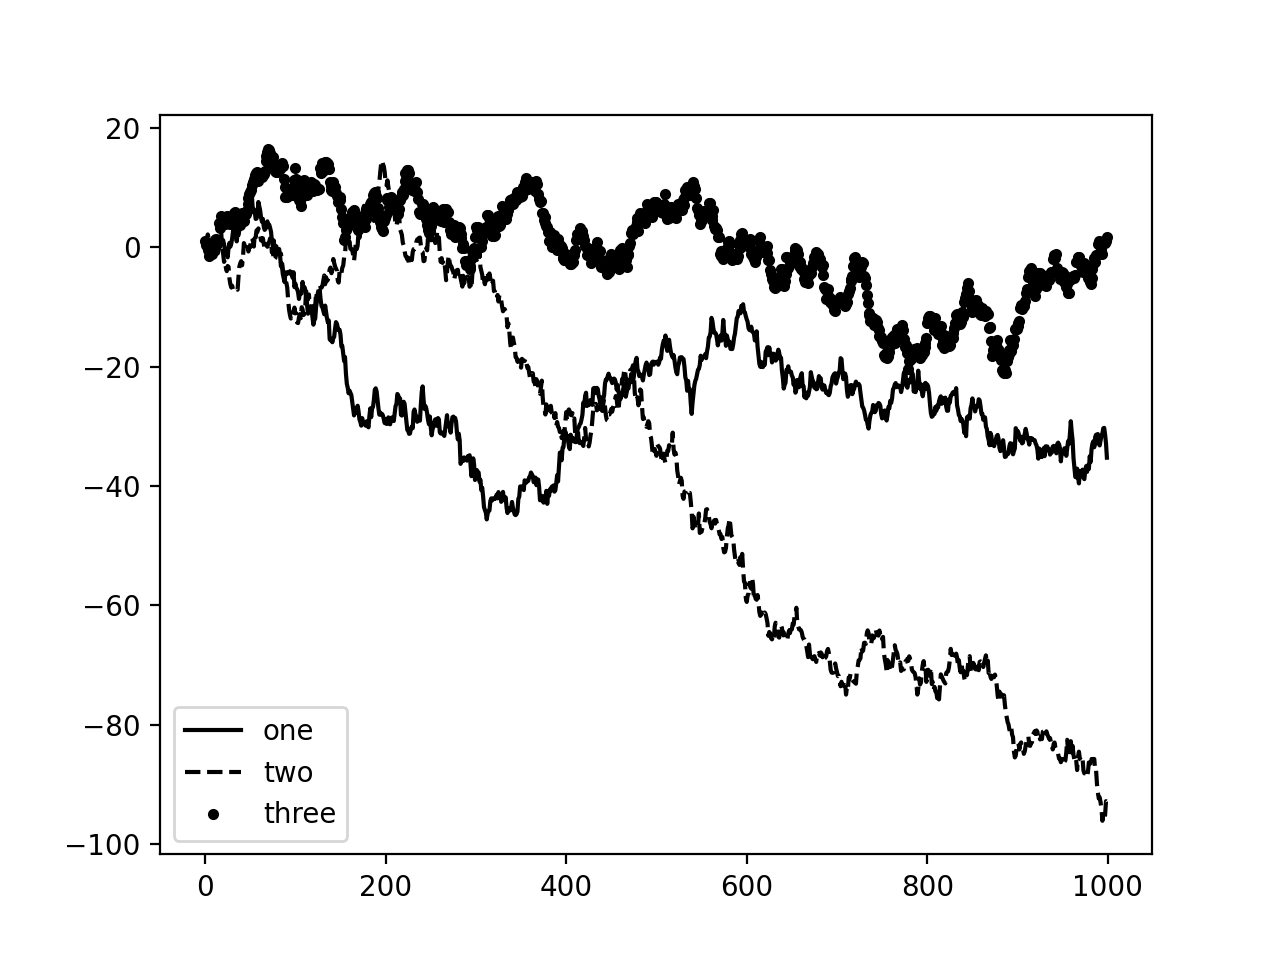

In [32]:
fig = plt.figure(); ax=fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one')

In [33]:
ax.plot(randn(1000).cumsum(), 'k--', label='two')

In [34]:
ax.plot(randn(1000).cumsum(), 'k.', label='three')

In [35]:
ax.legend(loc='best')

In [41]:
from datetime import datetime
import pandas as pd

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('examples/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
               xytext=(date, spx.asof(date) + 225),
                      arrowprops=dict(facecolor='black', headwidth=4, width=2, headlength=4),
                      horizontalalignment='left', verticalignment='top')
    
# 2007-2010 구간으로 확대
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')

<IPython.core.display.Javascript object>

/Users/adorable_hj/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


AttributeError: 'Annotation' object has no property 'verticalignment'

<IPython.core.display.Javascript object>


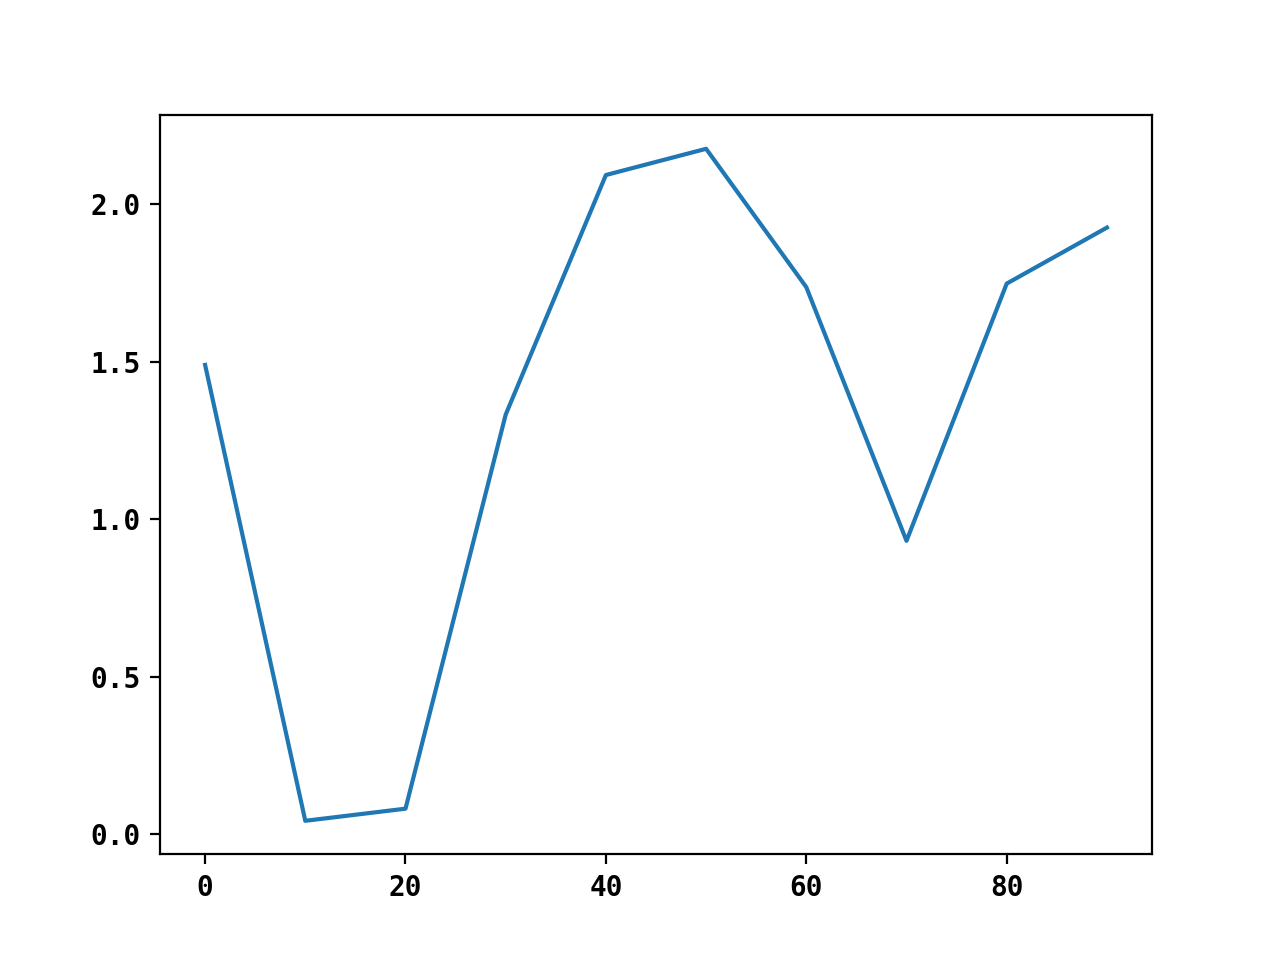

/Users/adorable_hj/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


In [43]:
flt = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]], color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

In [44]:
plt.savgfig('figpath.svg')

AttributeError: module 'matplotlib.pyplot' has no attribute 'savgfig'

In [45]:
plt.rc('figure', figsize=(10, 10))

In [46]:
font_options={'family': 'monospace', 'weight': 'bold', 'size': 'small'}
plt.rc('font', **font_options)

ValueError: Key font.size: Could not convert 'small' to float

In [50]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

<AxesSubplot:>

<IPython.core.display.Javascript object>


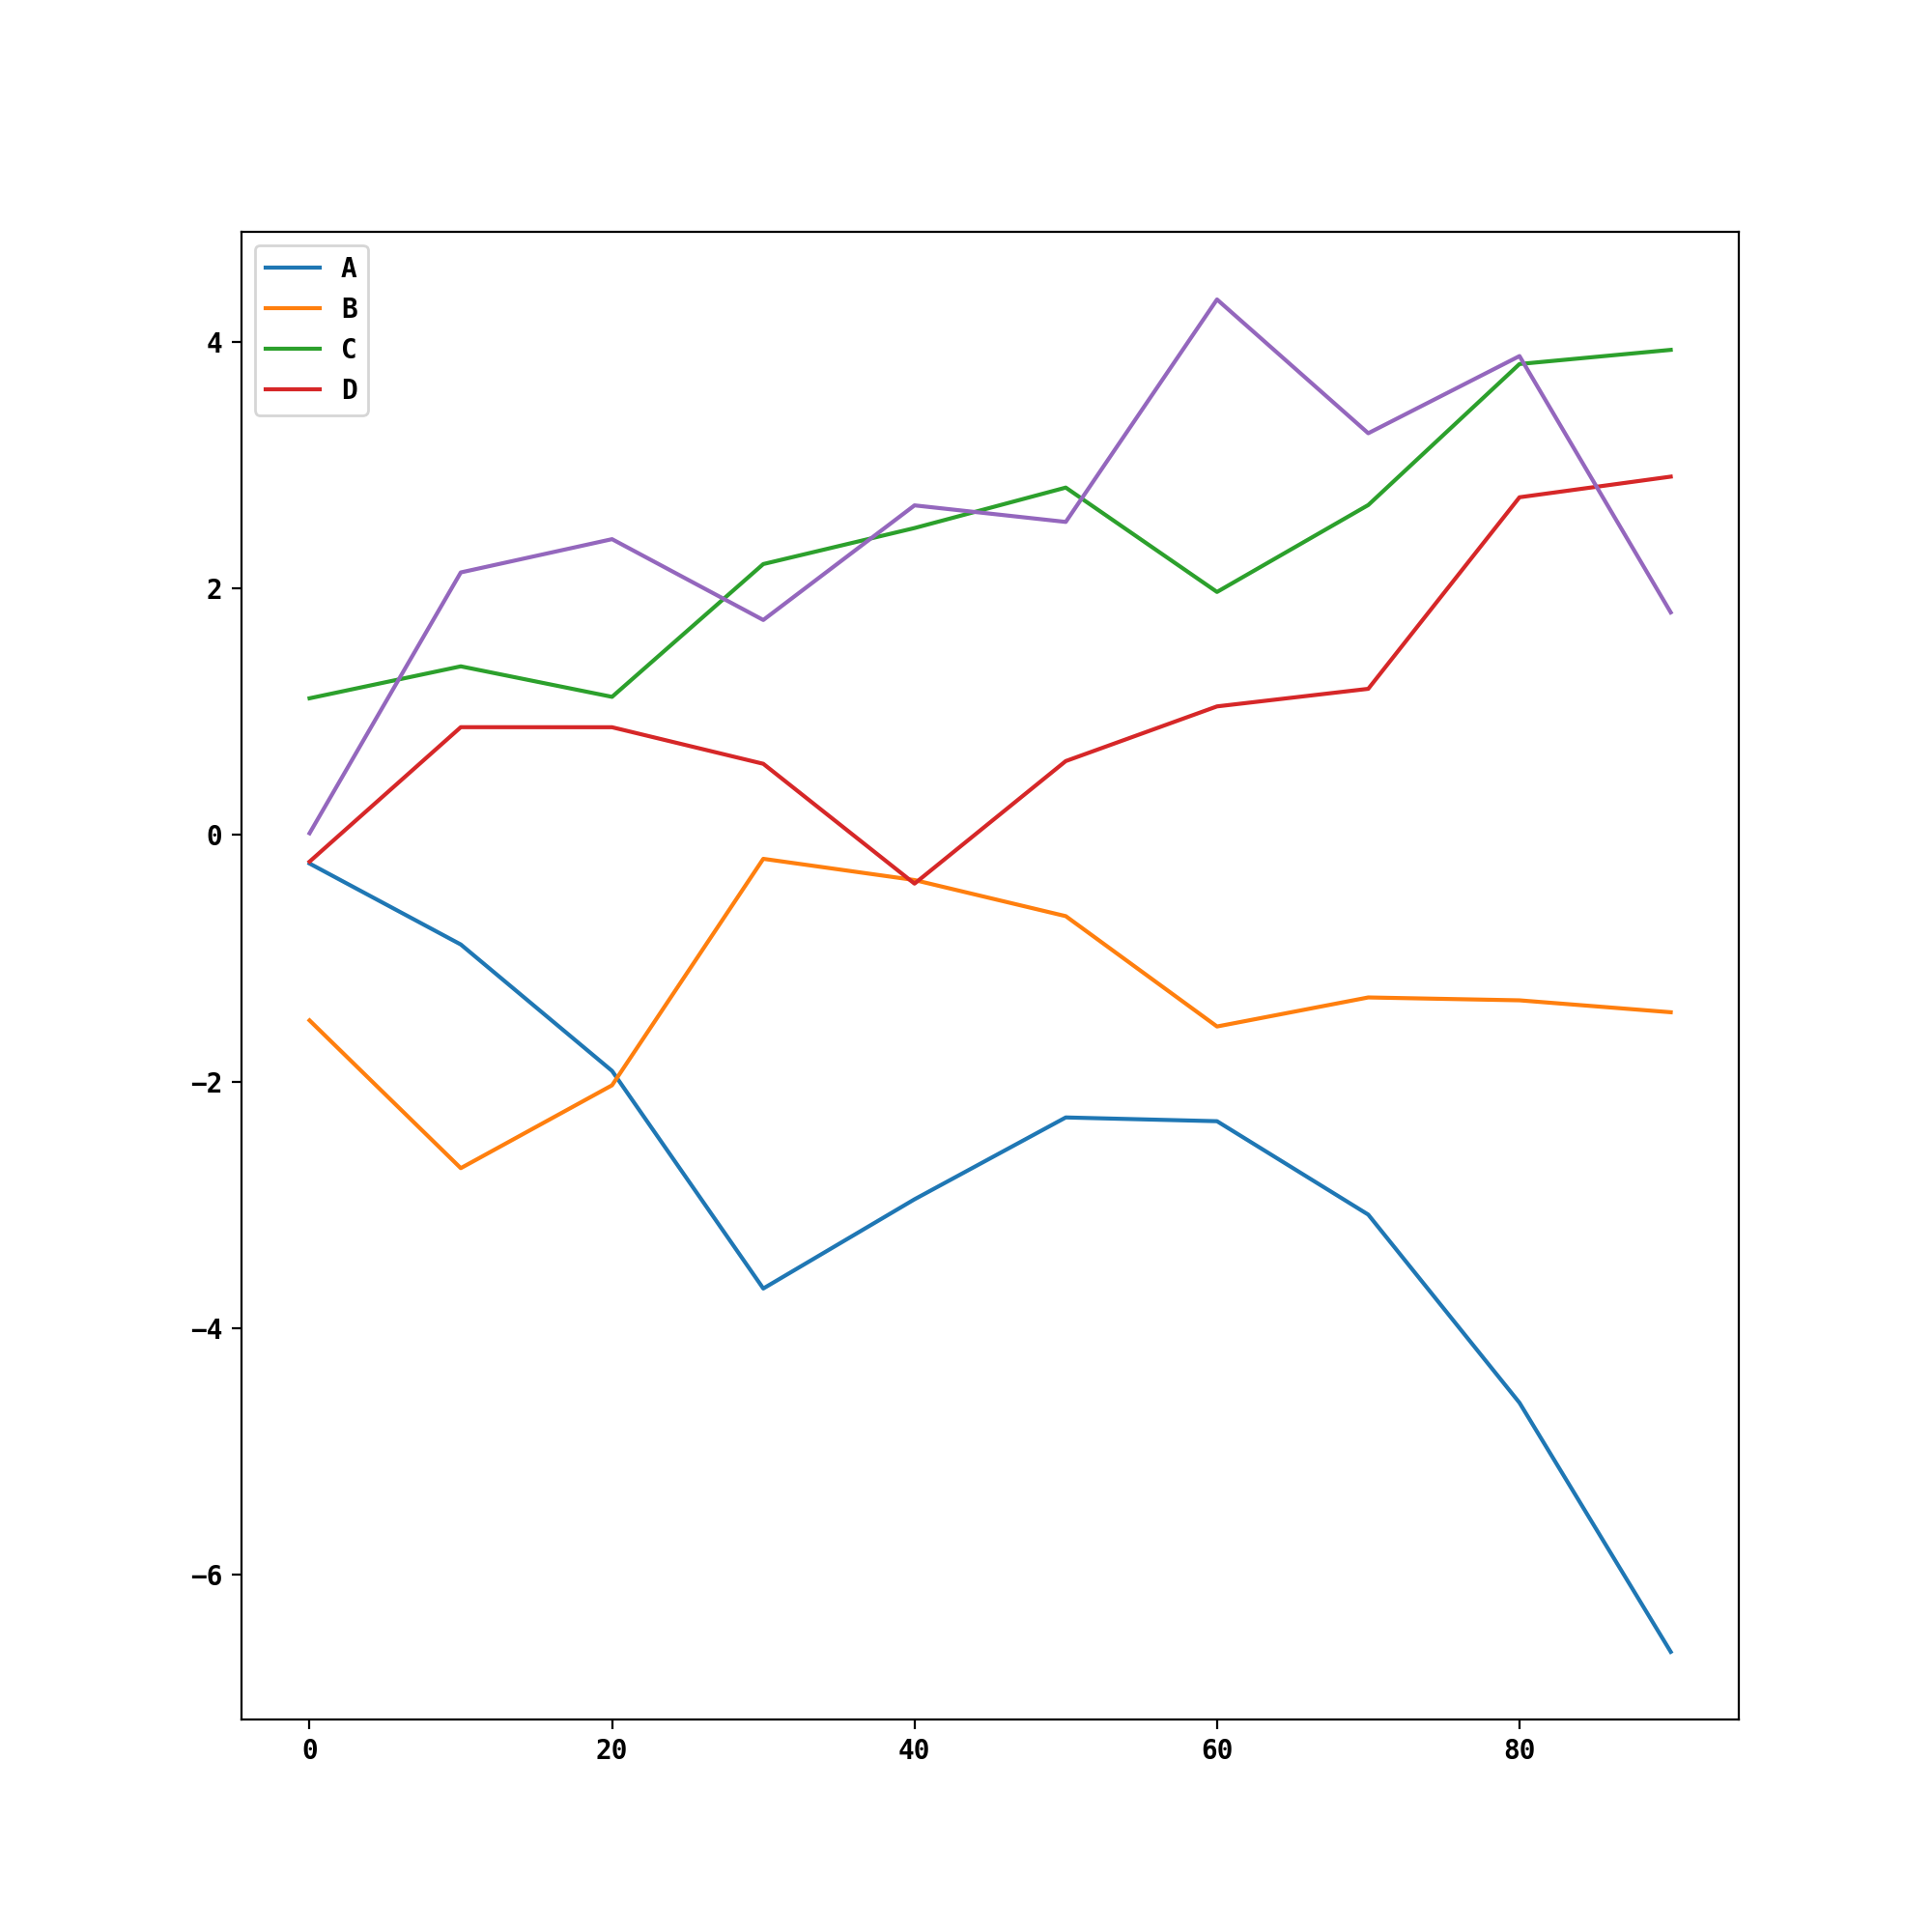

<AxesSubplot:>

In [49]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0), columns=['A', 'B', 'C', 'D'], index=np.arange(0, 100, 10))
df.plot()

<IPython.core.display.Javascript object>


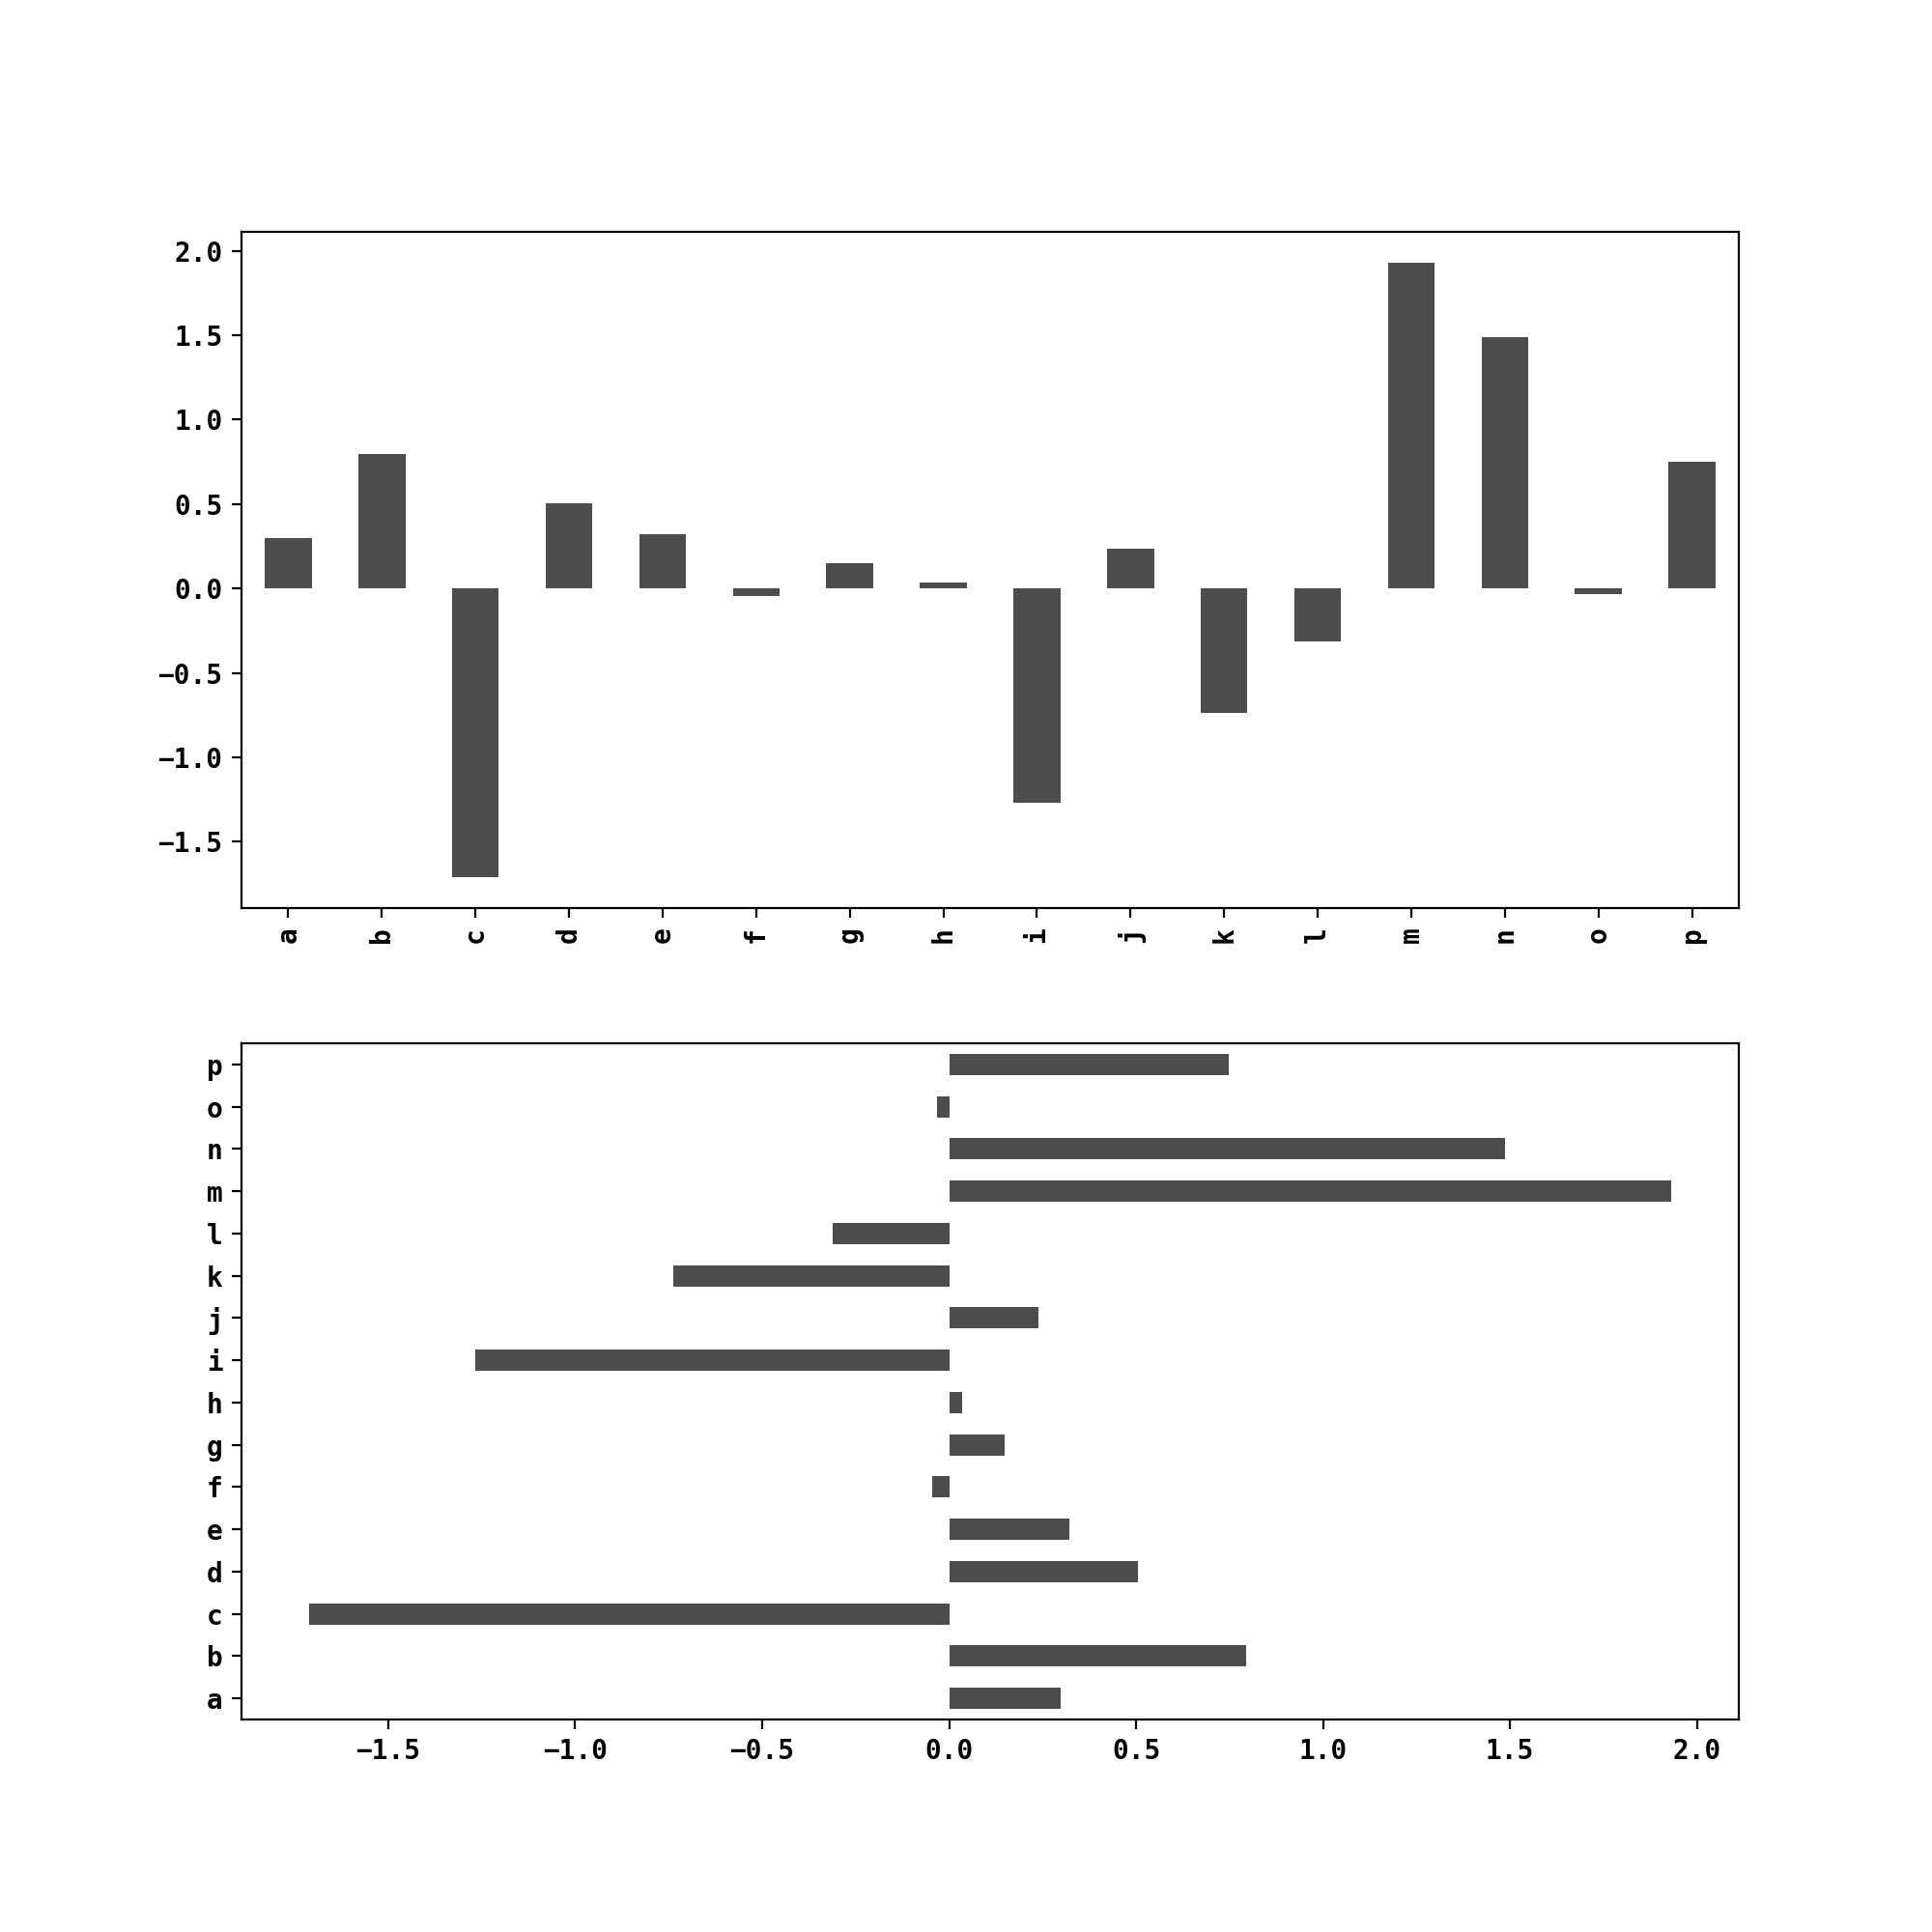

In [51]:
fig, axes = plt.subplots(2, 1)

In [52]:
data = pd.Series(np.random.randn(16), index=list('abcdefghijklmnop'))

In [53]:
data.plot.bar(ax=axes[0], color='k', alpha=0.7)

<AxesSubplot:>

In [54]:
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

<AxesSubplot:>

In [56]:
df = pd.DataFrame(np.random.randn(6, 4), index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))

In [57]:
df

Genus,A,B,C,D
one,-1.167873,2.410520,-1.325712,-0.814782
two,-0.513059,-0.118092,0.135174,-0.803395
three,0.781998,-0.300258,-0.307694,-0.097566
four,-0.195685,-1.357694,-0.098400,-1.339484
five,0.835672,0.069193,-0.409004,2.654302
six,0.328456,-0.278323,-0.678435,0.813699


<IPython.core.display.Javascript object>


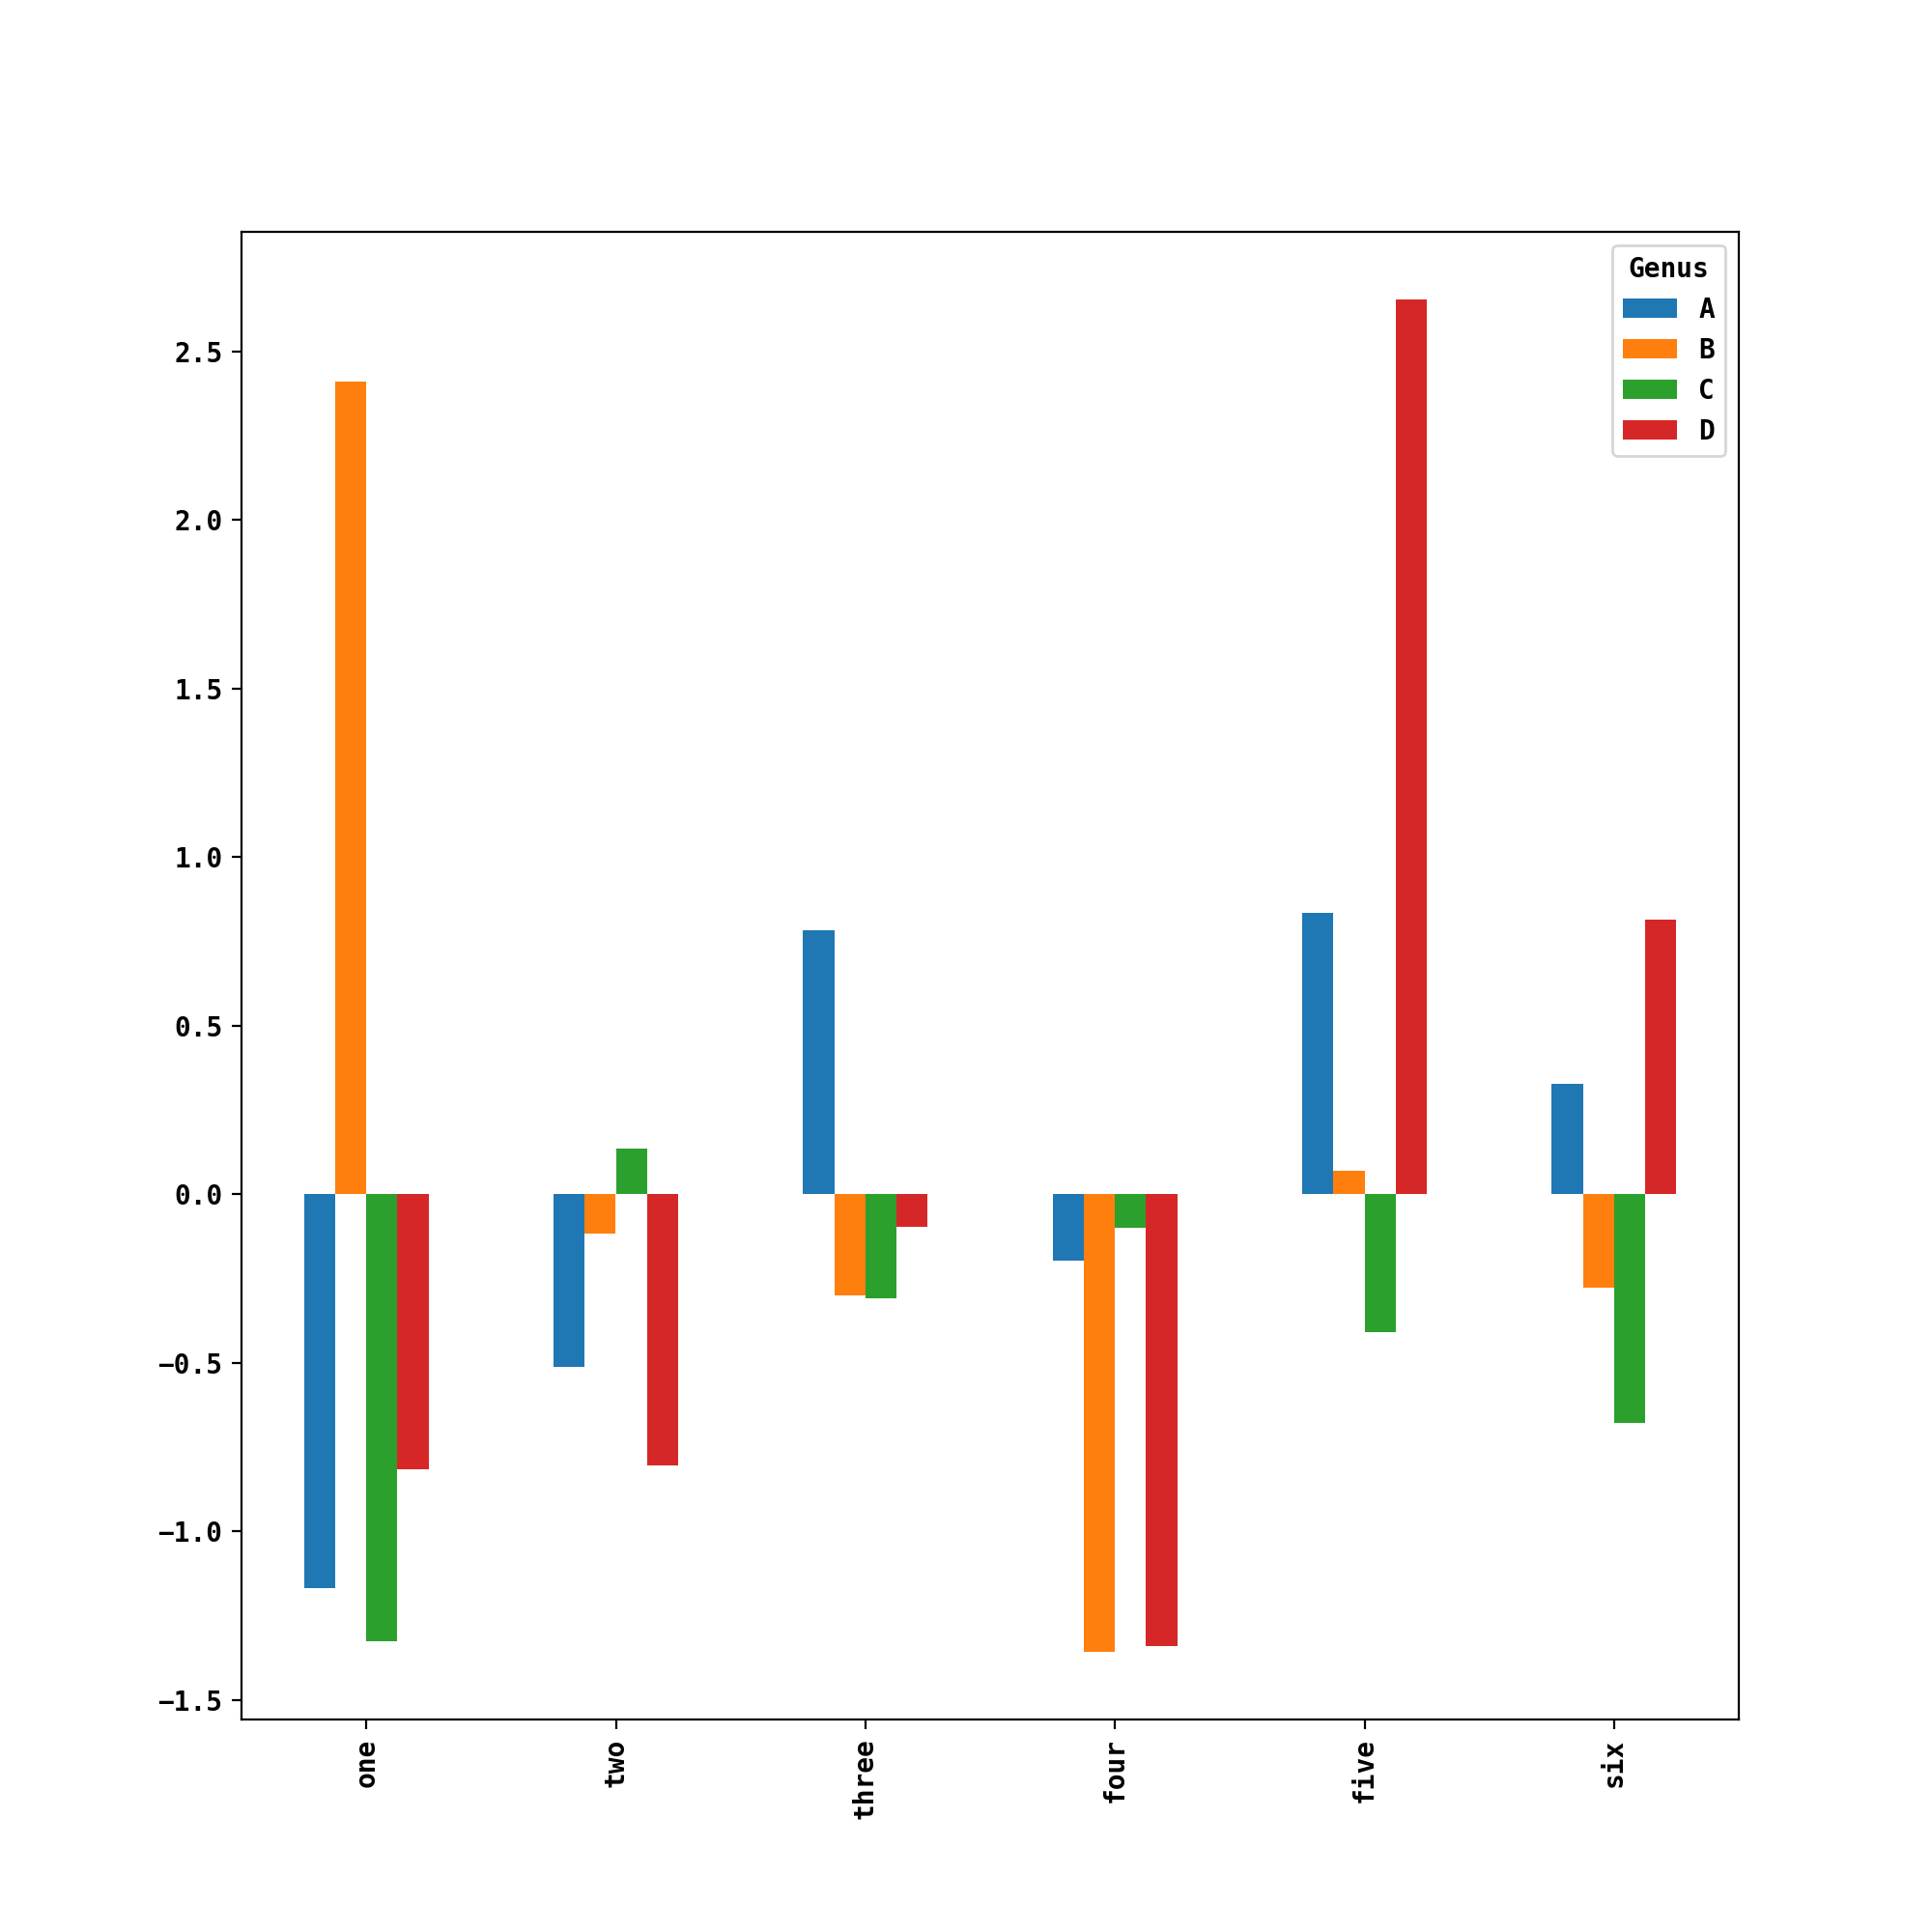

<AxesSubplot:>

In [58]:
df.plot.bar()

<IPython.core.display.Javascript object>


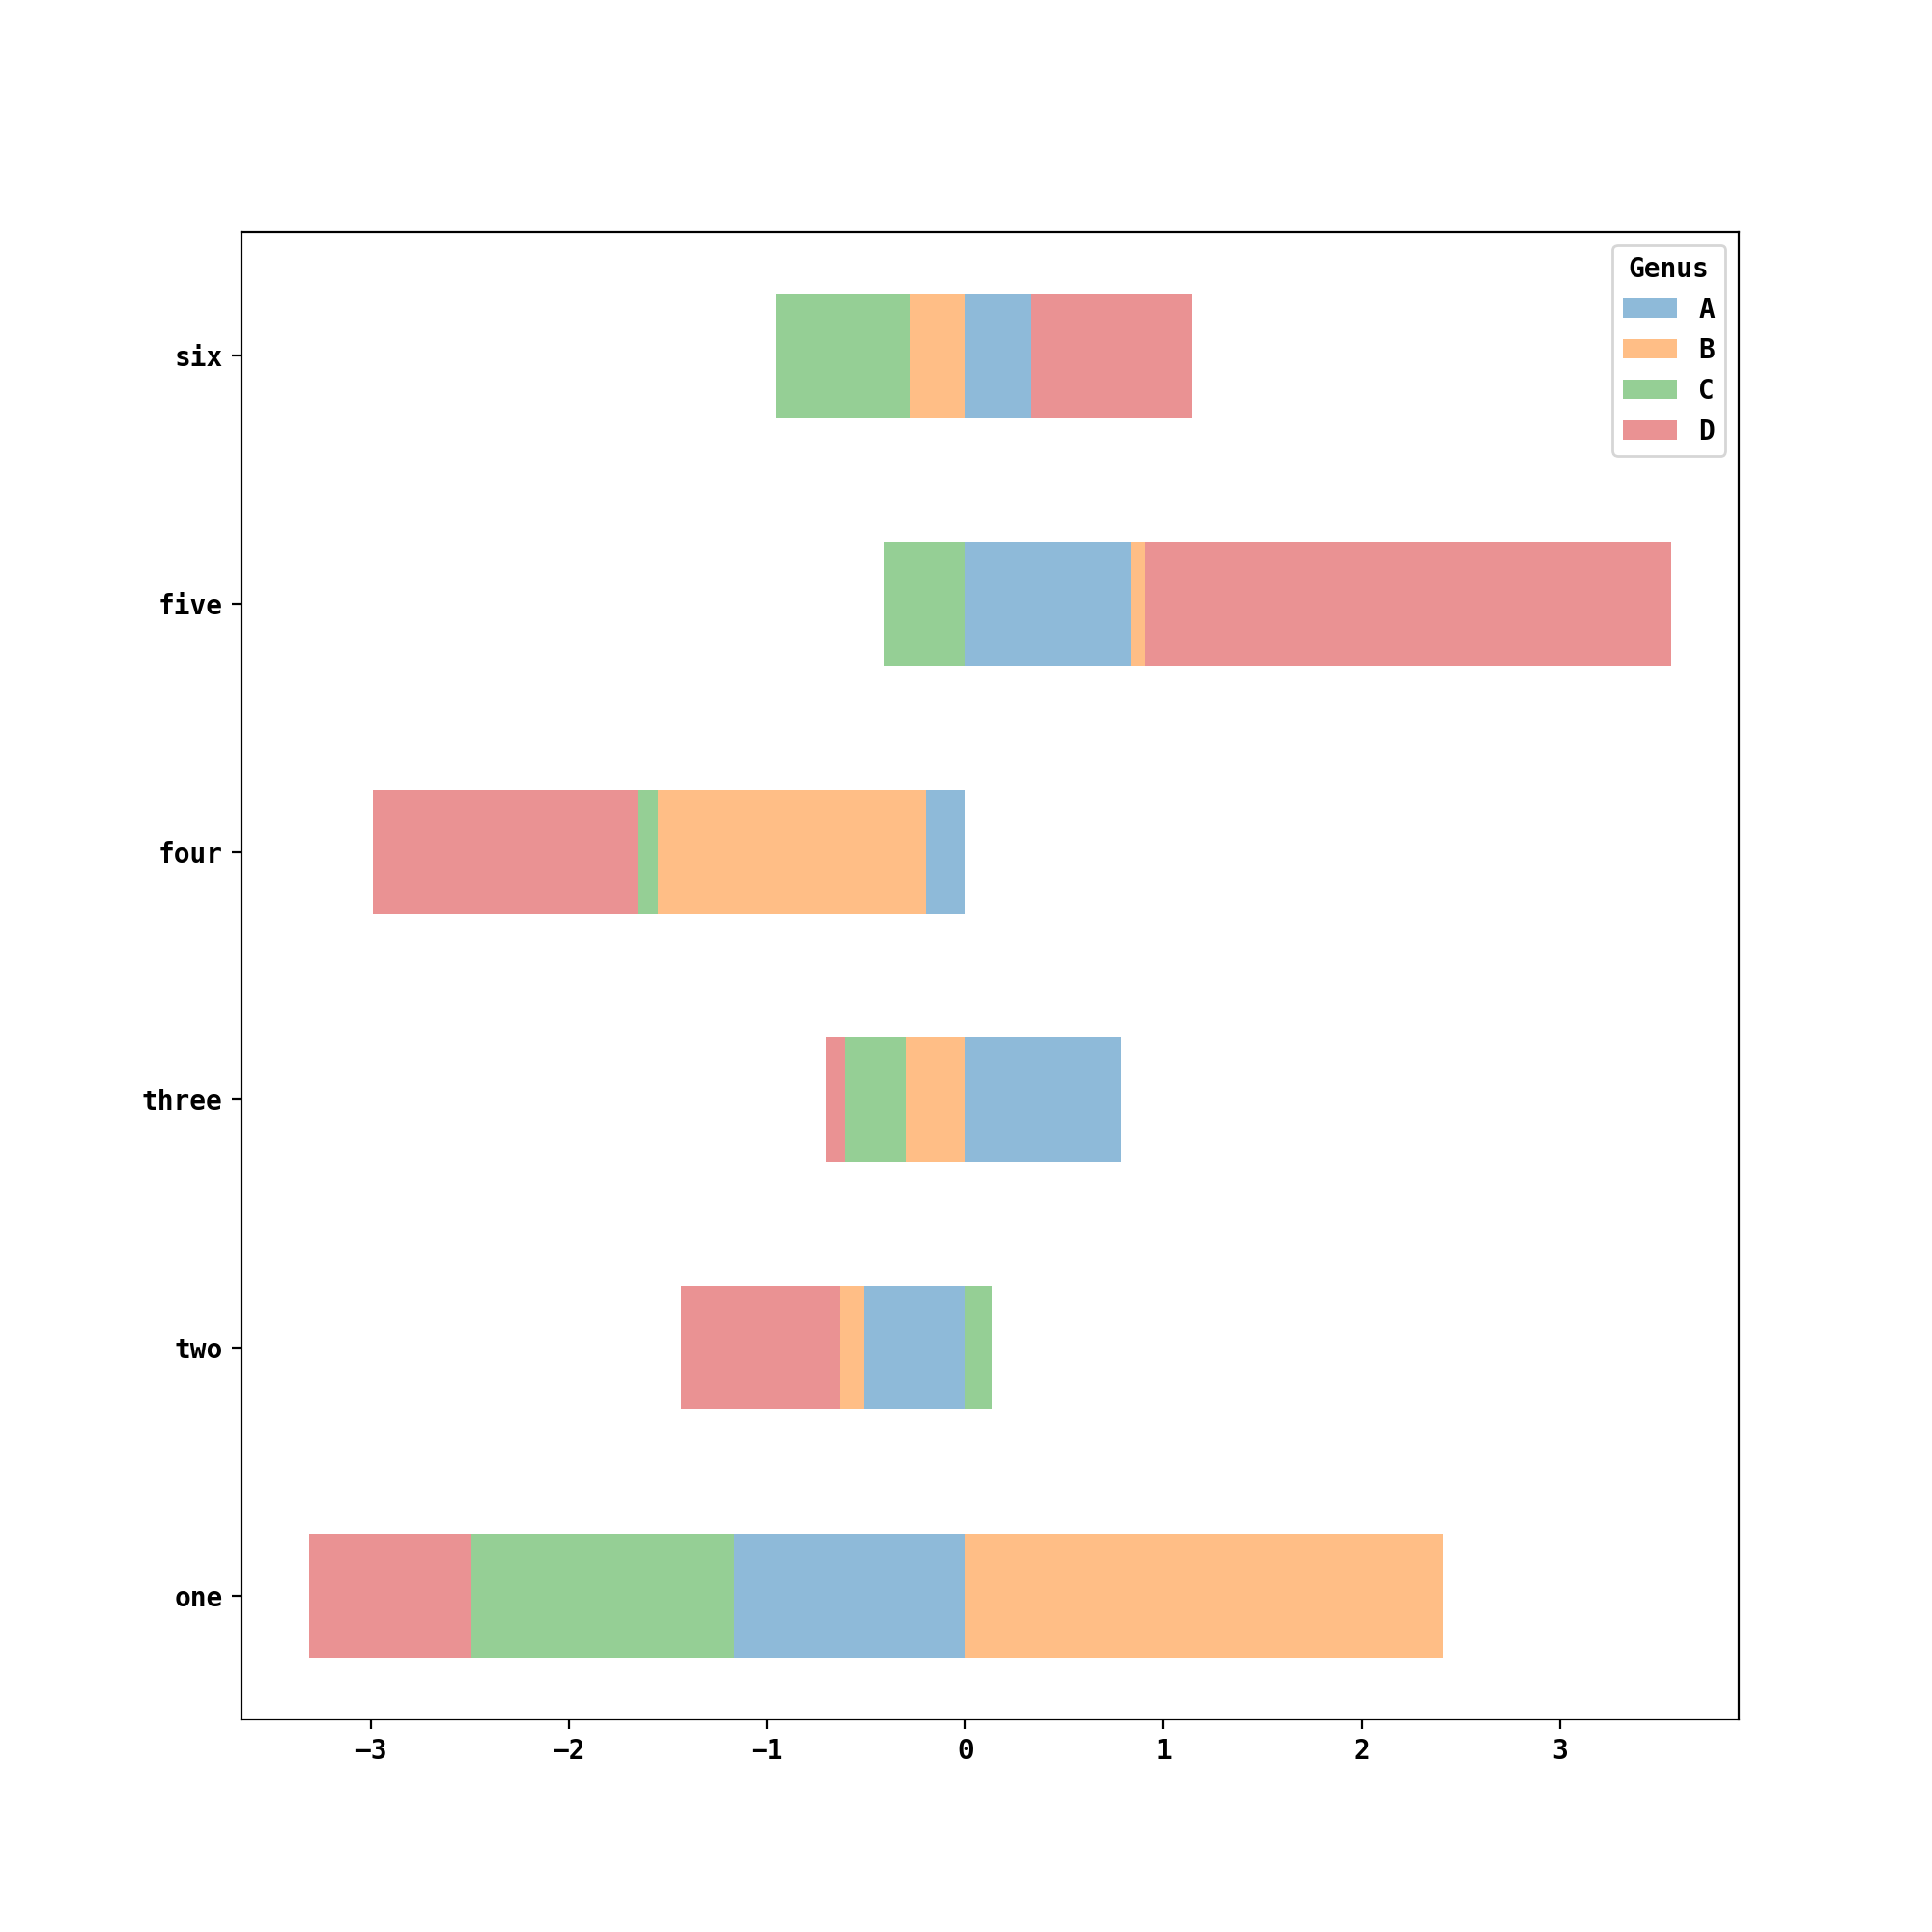

<AxesSubplot:>

In [59]:
df.plot.barh(stacked=True, alpha=0.5)

In [60]:
tips = pd.read_csv('examples/tips.csv')

In [61]:
party_counts = pd.crosstab(tips['day'], tips['size'])

In [62]:
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [63]:
party_counts = party_counts.loc[:, 2:5]

In [64]:
party_pcts = party_counts.div(party_counts.sum(1), axis=0)

In [65]:
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


<IPython.core.display.Javascript object>


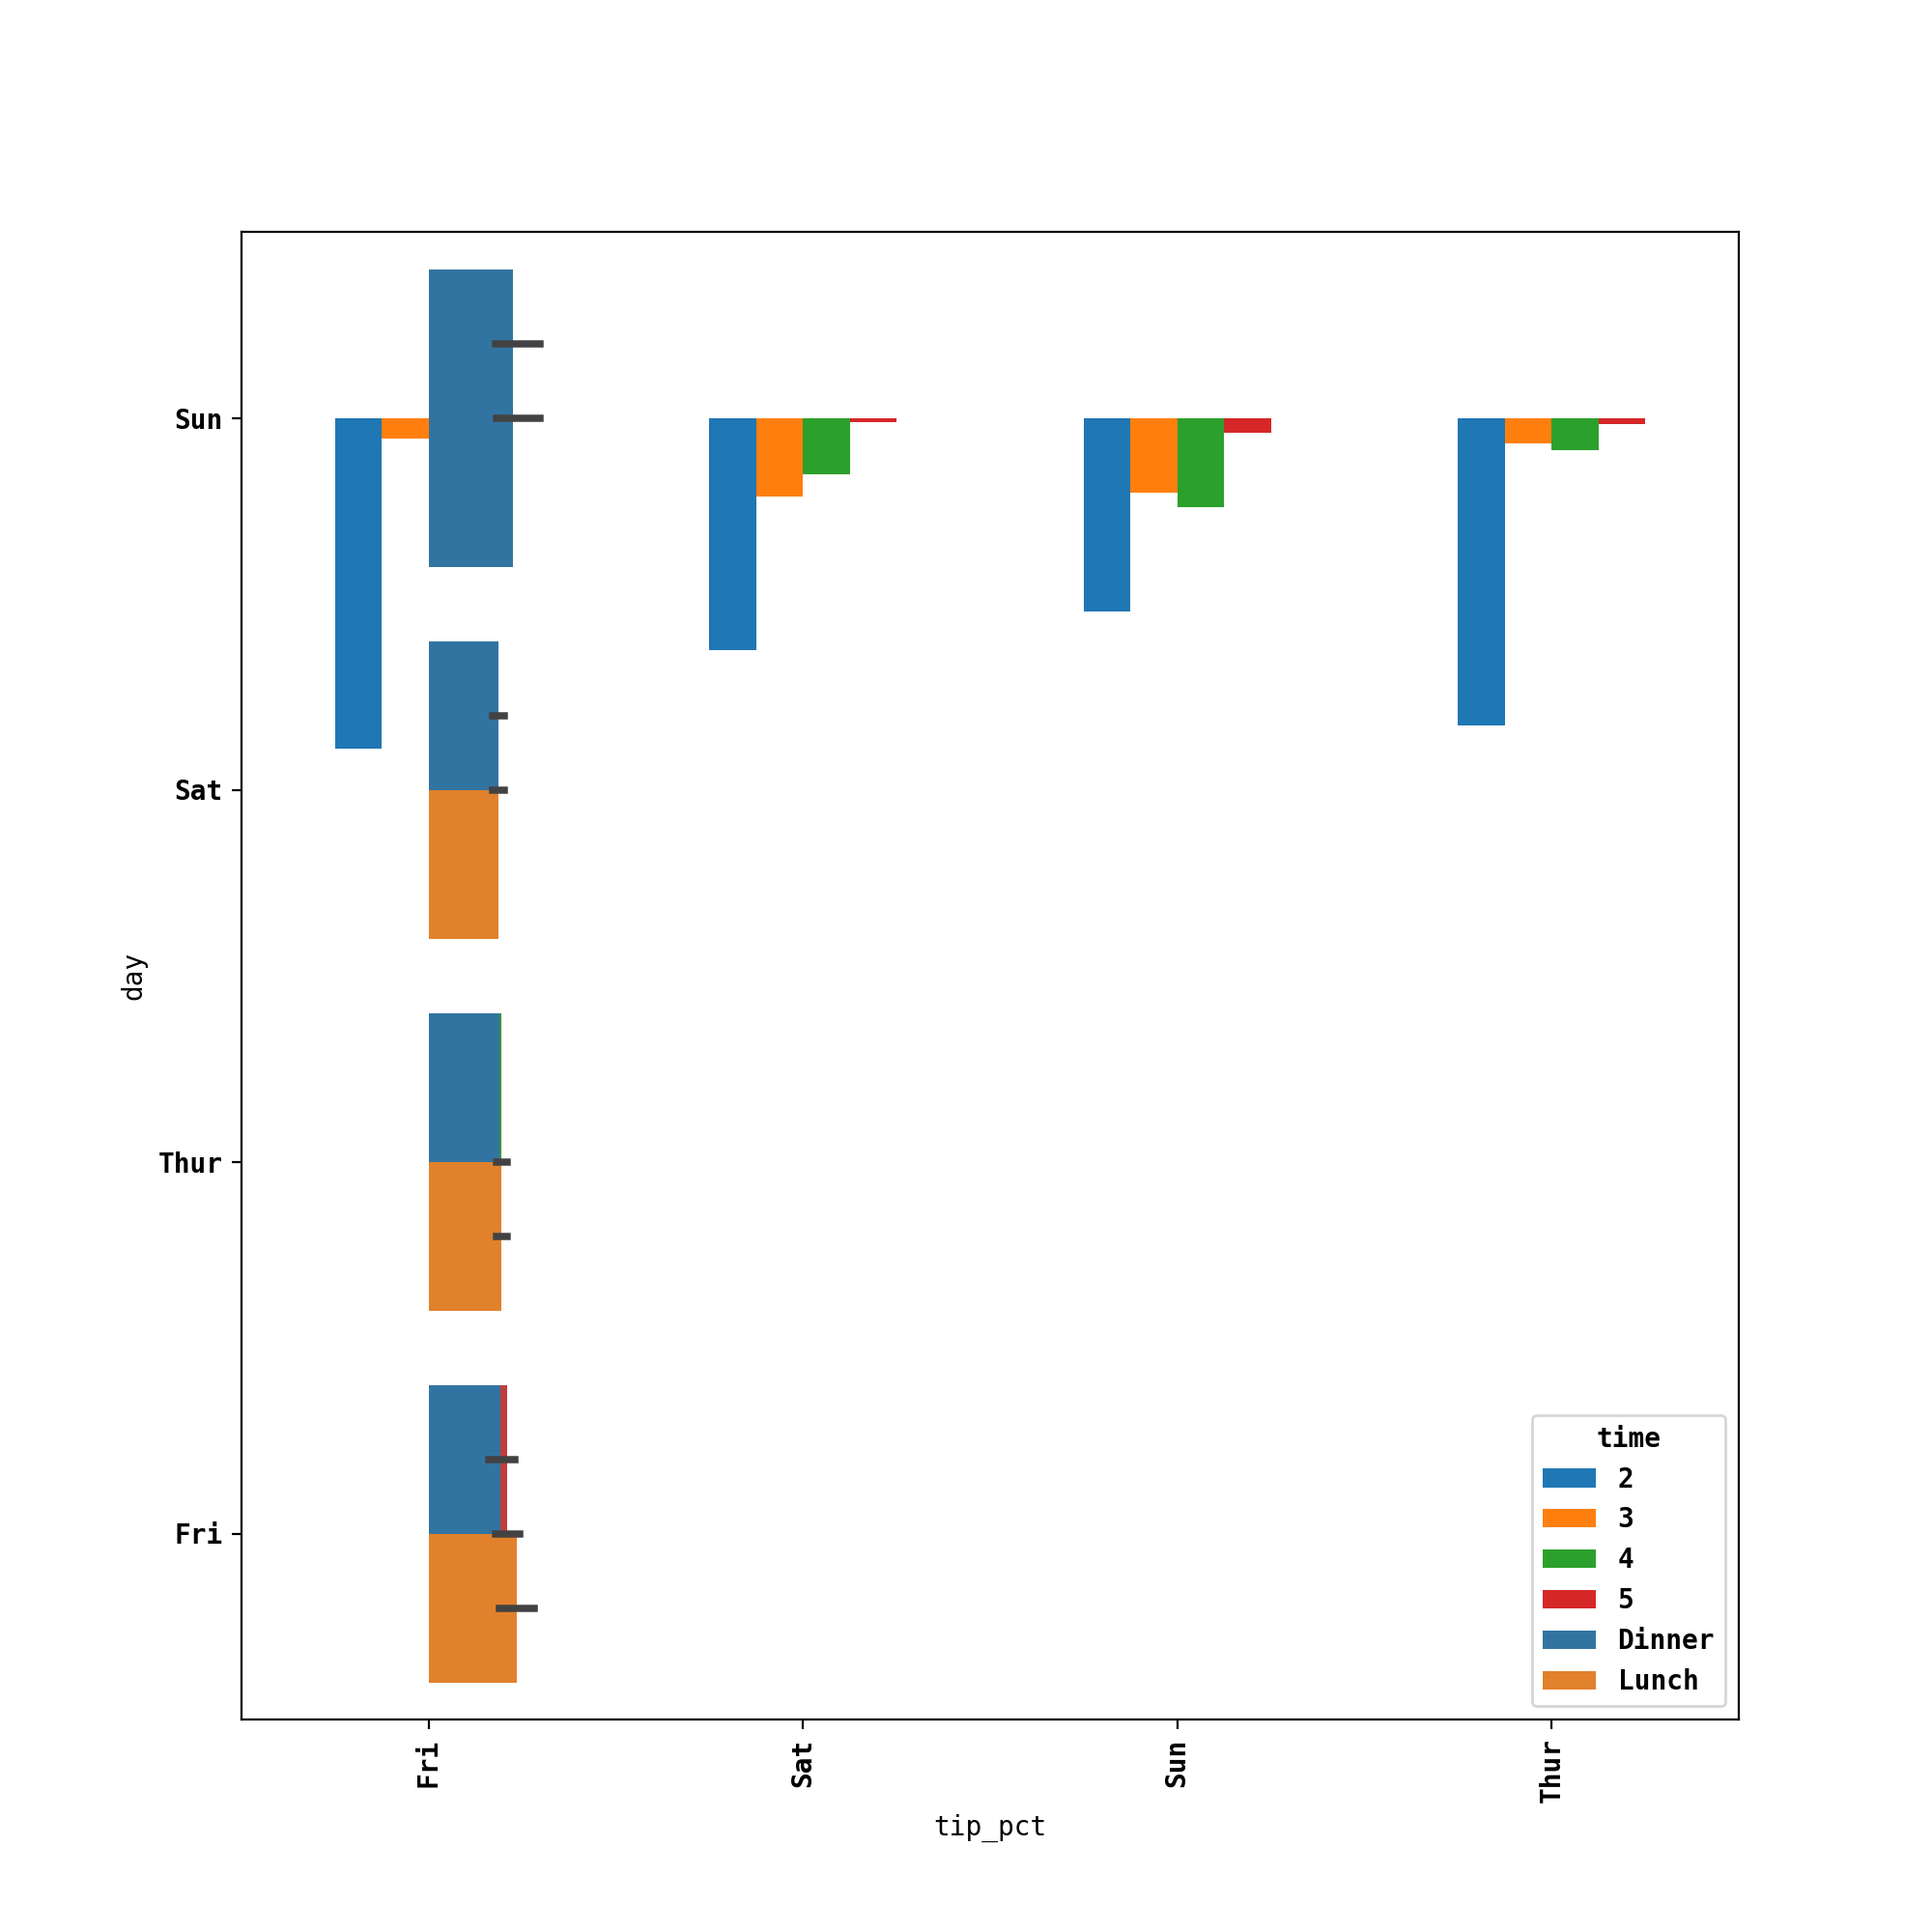

<AxesSubplot:xlabel='day'>

In [66]:
party_pcts.plot.bar()

In [68]:
import seaborn as sns

In [71]:
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])

In [72]:
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


In [73]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

In [74]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

<AxesSubplot:xlabel='tip_pct', ylabel='day'>